Meta AI

In [1]:
#exoplanet = "WASP-18 b"
#exoplanet = "WASP-96 b"
#exoplanet = "WASP-17 b"
exoplanet = "WASP-39 b"
#exoplanet = "WASP-107 b"

In [2]:
import astroquery.mast as mast
from specutils import Spectrum1D
import matplotlib.pyplot as plt

# Download the spectra
obs_table = mast.Observations.query_criteria(objectname=exoplanet, obs_collection="JWST", dataproduct_type="spectrum")
data_products = mast.Observations.get_product_list(obs_table)
data_products = data_products[data_products['dataproduct_type'] == "spectrum"]
data_products = data_products[data_products['productType'] == "SCIENCE"]
data_products = data_products[data_products['type'] == "D"]
data_products = data_products[data_products['productSubGroupDescription'] == "X1DINTS"]
data_products = data_products[data_products['dataRights'] == "PUBLIC"]
spectra = mast.Observations.download_products(data_products)



In [3]:
obs_table

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID,objID1,distance
str7,str4,str7,str13,str4,str13,str8,str7,str45,str50,float64,float64,str8,str16,int64,float64,float64,float64,float64,float64,str64,float64,str4,str3,int64,str132,str1,str81,str6,bool,float64,str9,str9,str9,float64
science,JWST,CALJWST,MIRI/SLITLESS,JWST,P750L,Infrared,WASP-39,--,jw02783-c1000_t001_miri_p750l-slitlessprism,217.3266479166666,-3.444500000000005,spectrum,"Powell, Diana",3,59989.60439799398,59989.97610791666,28575.989,5000.0,10000.0,MIRI LRS follow up on SO2 detection in WASP-39b,59990.12450235,2783,DD,--,POLYGON 217.32708482 -3.45383889 217.32491421 -3.45366944 217.32589378 -3.44086944 217.32804766 -3.44104167 217.32708482 -3.45383889,--,mast:JWST/product/jw02783-c1000_t001_miri_p750l-slitlessprism_x1dints.fits,PUBLIC,False,nan,116666787,232284704,232284704,0.0
science,JWST,CALJWST,NIRCAM/GRISM,JWST,F322W2;GRISMR,Infrared,WASP-39,Star; Exoplanet Systems,jw01366-o002_t001_nircam_f322w2-grismr-subgrism256,217.3266105011862,-3.4444993237274284,spectrum,"Batalha, Natalie",3,59782.78341226528,59783.15175280093,29080.424,2430.0,4013.0000000000005,The Transiting Exoplanet Community Early Release Science Program,59783.36443288,1366,ERS,--,POLYGON 217.35463336 -3.44487113 217.31827043 -3.44512151 217.31832056 -3.44053818 217.35454974 -3.44034058 217.35463336 -3.44487113,--,mast:JWST/product/jw01366-o002_t001_nircam_f322w2-grismr-subgrism256_x1dints.fits,PUBLIC,False,nan,87682152,393198875,393198875,0.0
science,JWST,CALJWST,NIRSPEC/SLIT,JWST,F290LP;G395H,Infrared,WASP-39,Star; Exoplanet Systems,jw01366-o003_t001_nirspec_f290lp-g395h-sub2048,217.32661038344096,-3.4444993215992223,spectrum,"Batalha, Natalie",3,59790.90101464306,59791.264188078705,29360.1,2870.0,5140.0,The Transiting Exoplanet Community Early Release Science Program,59791.49905091,1366,ERS,--,POLYGON 217.32692484 -3.44451877 217.3265909 -3.44481321 217.32629871 -3.44447988 217.32662986 -3.44418265 217.32692484 -3.44451877,--,mast:JWST/product/jw01366-o003_t001_nirspec_f290lp-g395h-sub2048_x1dints.fits,PUBLIC,False,nan,211172317,393203489,393203489,0.0
science,JWST,CALJWST,NIRSPEC/SLIT,JWST,CLEAR;PRISM,Infrared,WASP-39,Star; Exoplanet Systems,jw01366-o004_t001_nirspec_clear-prism-sub512,217.32661067778082,-3.4444993269193187,spectrum,"Batalha, Natalie",3,59770.62185407593,59770.98418107639,24312.2,600.0,5300.0,The Transiting Exoplanet Community Early Release Science Program,59774.5416666,1366,ERS,--,POLYGON 217.32692513 -3.44451877 217.3265912 -3.44481322 217.326299 -3.44447988 217.32663016 -3.44418266 217.32692513 -3.44451877,--,mast:JWST/product/jw01366-o004_t001_nirspec_clear-prism-sub512_x1dints.fits,PUBLIC,False,nan,211791402,393402836,393402836,0.0
science,JWST,CALJWST,NIRISS/SOSS,JWST,CLEAR;GR700XD,Infrared,WASP-39,Star; Exoplanet Systems,jw01366-o001_t001_niriss_clear-gr700xd-substrip256,217.32661044232316,-3.4444993226634986,spectrum,"Batalha, Natalie",3,59786.8567646875,59787.206306388885,26552.502,600.0,2800.0,The Transiting Exoplanet Community Early Release Science Program,59787.58458325,1366,ERS,--,POLYGON 217.36258951 -3.44940976 217.32440645 -3.44920765 217.32449274 -3.44047432 217.36267823 -3.4406792 217.36258951 -3.44940976,--,mast:JWST/product/jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits,PUBLIC,False,nan,87742481,393561578,393561578,0.0
science,JWST,CALJWST,MIRI/SLITLESS,JWST,P750L,Infrared,WASP-39,Star; Exoplanet Systems; Exoplanets; G dwarfs,jw02783-o002_t001_miri_p750l-slitlessprism,217.32660752184862,-3.4444990745945345,spectrum,"Powell, Diana",3,59989.96960207963,59989.976107916664,160.471,5000.0,10000.0,MIRI LRS follow up on SO2 detection in WASP-39b,59990.08

In [4]:
data_products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str9,str4,str8,str50,str64,str1,str81,str9,str28,str13,str1,str7,str6,str4,str63,int64,str9,str6,int64,str13
87682152,JWST,spectrum,jw01366-o002_t001_nircam_f322w2-grismr-subgrism256,exposure/target (L2b/L3): 1D extracted spectrum per integration,D,mast:JWST/product/jw01366-o002_t001_nircam_f322w2-grismr-subgrism256_x1dints.fits,SCIENCE,Minimum Recommended Products,X1DINTS,--,CALJWST,1.13.3,1366,jw01366-o002_t001_nircam_f322w2-grismr-subgrism256_x1dints.fits,119476800,87682152,PUBLIC,3,F322W2;GRISMR
87742481,JWST,spectrum,jw01366-o001_t001_niriss_clear-gr700xd-substrip256,exposure/target (L2b/L3): 1D extracted spectrum per integration,D,mast:JWST/product/jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits,SCIENCE,Minimum Recommended Products,X1DINTS,--,CALJWST,1.13.3,1366,jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits,475807680,87742481,PUBLIC,3,CLEAR;GR700XD
116647916,JWST,spectrum,jw02783-o002_t001_miri_p750l-slitlessprism,exposure/target (L2b/L3): 1D extracted spectrum per integration,D,mast:JWST/product/jw02783-o002_t001_miri_p750l-slitlessprism_x1dints.fits,SCIENCE,Minimum Recommended Products,X1DINTS,--,CALJWST,1.13.3,2783,jw02783-o002_t001_miri_p750l-slitlessprism_x1dints.fits,780480,116647916,PUBLIC,3,P750L
116665529,JWST,spectrum,jw02783-o001_t001_miri_p750l-slitlessprism,exposure/target (L2b/L3): 1D extracted spectrum per integration,D,mast:JWST/product/jw02783-o001_t001_miri_p750l-slitlessprism_x1dints.fits,SCIENCE,Minimum Recommended Products,X1DINTS,--,CALJWST,1.13.3,2783,jw02783-o001_t001_miri_p750l-slitlessprism_x1dints.fits,130582080,116665529,PUBLIC,3,P750L
116666787,JWST,spectrum,jw02783-c1000_t001_miri_p750l-slitlessprism,exposure/target (L2b/L3): 1D extracted spectrum per integration,D,mast:JWST/product/jw02783-c1000_t001_miri_p750l-slitlessprism_x1dints.fits,SCIENCE,Minimum Recommended Products,X1DINTS,--,CALJWST,1.9.6,2783,jw02783-c1000_t001_miri_p750l-slitlessprism_x1dints.fits,131158080,116666787,PUBLIC,3,P750L
211172317,JWST,spectrum,jw01366-o003_t001_nirspec_f290lp-g395h-sub2048,exposure/target (L2b/L3): 1D extracted spectrum per integration,D,mast:JWST/product/jw01366-o003_t001_nirspec_f290lp-g395h-sub2048_x1dints.fits,SCIENCE,Minimum Recommended Products,X1DINTS,--,CALJWST,1.13.3,1366,jw01366-o003_t001_nirspec_f290lp-g395h-sub2048_x1dints.fits,248267520,211172317,PUBLIC,3,F290LP;G395H
211791402,JWST,spectrum,jw01366-o004_t001_nirspec_clear-prism-sub512,exposure/target (L2b/L3): 1D extracted spectrum per integration,D,mast:JWST/product/jw01366-o004_t001_nirspec_clear-prism-sub512_x1dints.fits,SCIENCE,Minimum Recommended Products,X1DINTS,--,CALJWST,1.13.3,1366,jw01366-o004_t001_nirspec_clear-prism-sub512_x1dints.fits,1707137280,211791402,PUBLIC,3,CLEAR;PRISM


In [5]:
spectra

Local Path,Status,Message,URL
str134,str8,object,object
./mastDownload/JWST/jw01366-o001_t001_niriss_clear-gr700xd-substrip256/jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits,COMPLETE,None,None
./mastDownload/JWST/jw01366-o002_t001_nircam_f322w2-grismr-subgrism256/jw01366-o002_t001_nircam_f322w2-grismr-subgrism256_x1dints.fits,COMPLETE,None,None
./mastDownload/JWST/jw01366-o003_t001_nirspec_f290lp-g395h-sub2048/jw01366-o003_t001_nirspec_f290lp-g395h-sub2048_x1dints.fits,COMPLETE,None,None
./mastDownload/JWST/jw01366-o004_t001_nirspec_clear-prism-sub512/jw01366-o004_t001_nirspec_clear-prism-sub512_x1dints.fits,COMPLETE,None,None
./mastDownload/JWST/jw02783-c1000_t001_miri_p750l-slitlessprism/jw02783-c1000_t001_miri_p750l-slitlessprism_x1dints.fits,COMPLETE,None,None
./mastDownload/JWST/jw02783-o001_t001_miri_p750l-slitlessprism/jw02783-o001_t001_miri_p750l-slitlessprism_x1dints.fits,COMPLETE,None,None
./mastDownload/JWST/jw02783-o002_t001_miri_p750l-slitlessprism/jw02783-o002_t001_miri_p750l-slitlessprism_x1dints.fits,COMPLETE,None,None


In [6]:
spectra['Local Path'][0]

'./mastDownload/JWST/jw01366-o001_t001_niriss_clear-gr700xd-substrip256/jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits'

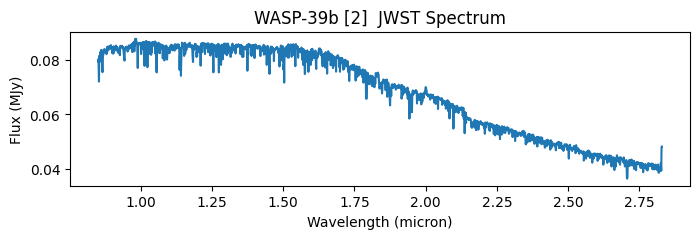

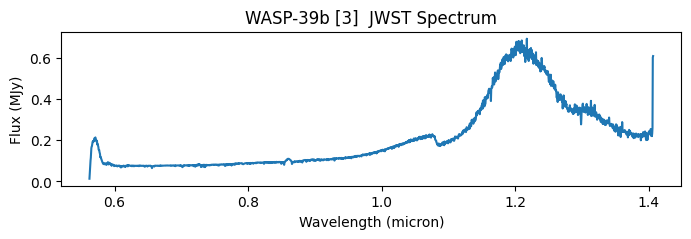

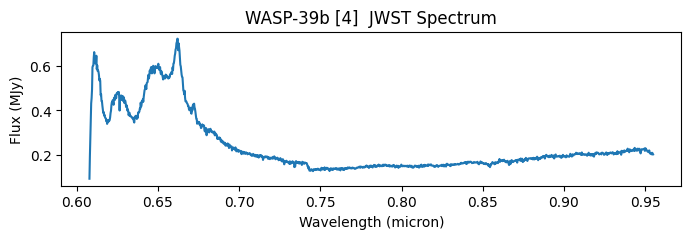

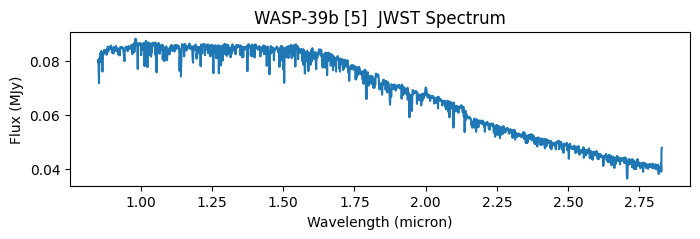

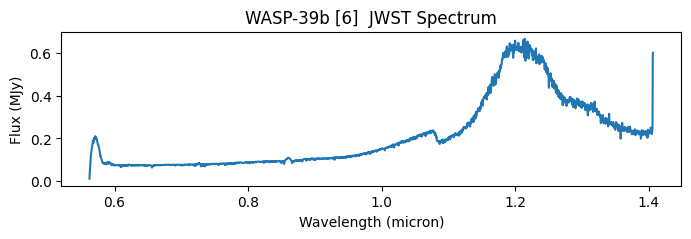

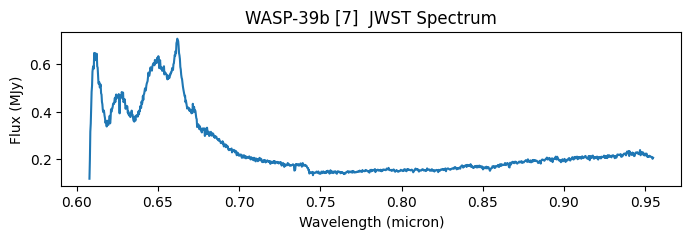

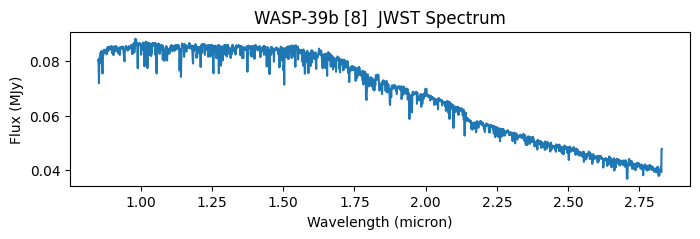

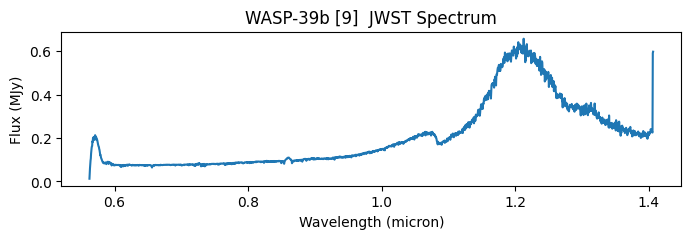

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt

target = "WASP-39b"

for i in range(2, 10):
    df = fits.getdata("./mastDownload/JWST/jw01366-o001_t001_niriss_clear-gr700xd-substrip256/jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw01366-o002_t001_nircam_f322w2-grismr-subgrism256/jw01366-o002_t001_nircam_f322w2-grismr-subgrism256_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw01366-o003_t001_nirspec_f290lp-g395h-sub2048/jw01366-o003_t001_nirspec_f290lp-g395h-sub2048_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw01366-o004_t001_nirspec_clear-prism-sub512/jw01366-o004_t001_nirspec_clear-prism-sub512_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw02783-c1000_t001_miri_p750l-slitlessprism/jw02783-c1000_t001_miri_p750l-slitlessprism_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw02783-o001_t001_miri_p750l-slitlessprism/jw02783-o001_t001_miri_p750l-slitlessprism_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw02783-o002_t001_miri_p750l-slitlessprism/jw02783-o002_t001_miri_p750l-slitlessprism_x1dints.fits", i)

    # Plot the spectra
    plt.figure(figsize=(8, 2))
    plt.plot(df['WAVELENGTH'], df['FLUX'], label='FLUX')
    plt.xlabel("Wavelength (micron)")
    plt.ylabel("Flux (MJy)")
    plt.title(str(target) + ' [' + str(i) + '] ' + " JWST Spectrum")
    plt.show()

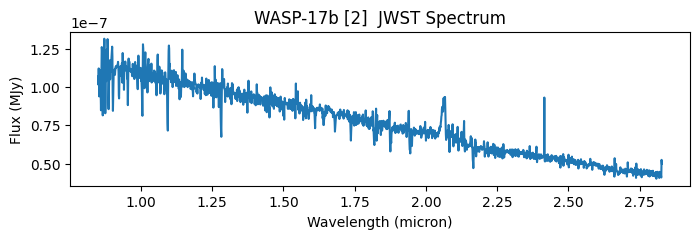

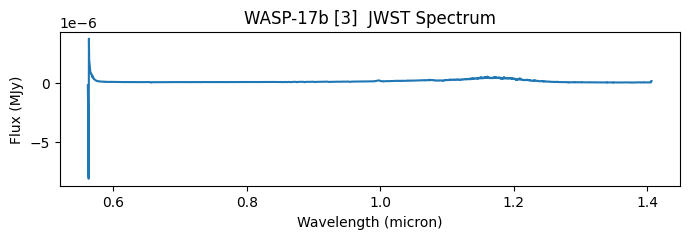

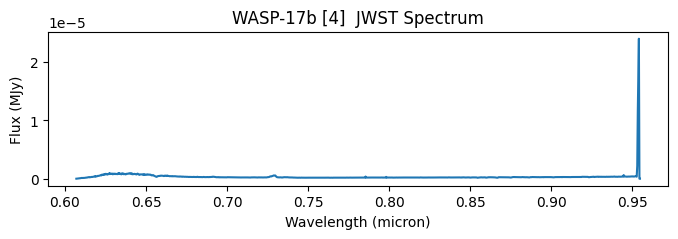

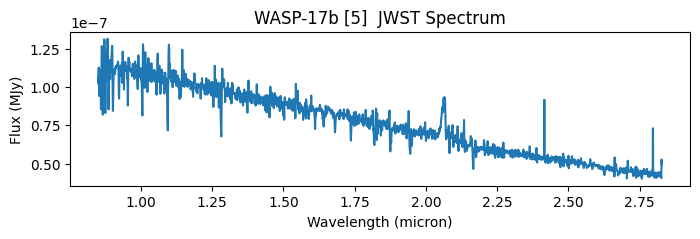

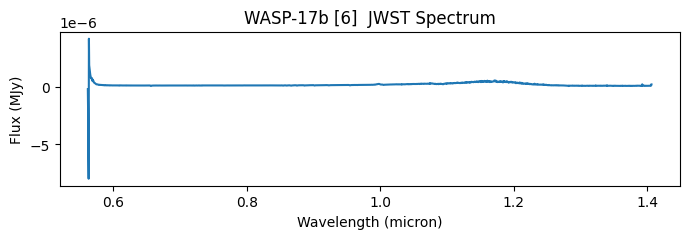

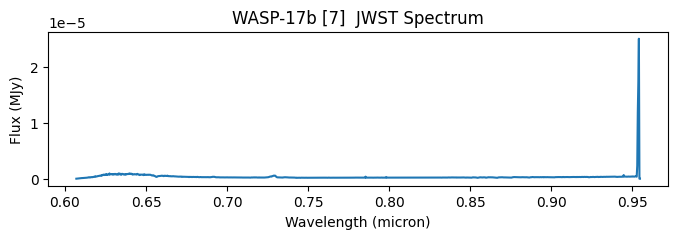

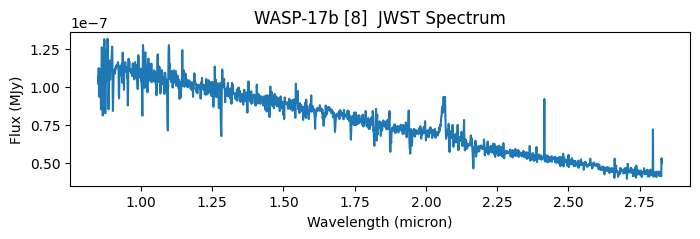

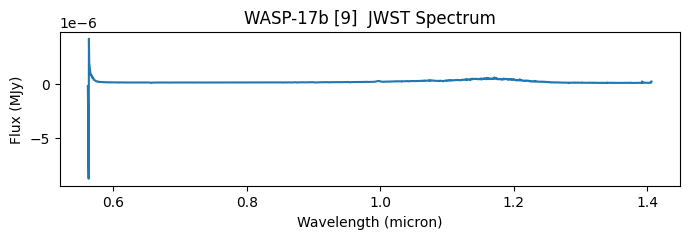

In [58]:
from astropy.io import fits
import matplotlib.pyplot as plt

target = "WASP-17b"

for i in range(2, 10):
    df = fits.getdata("./mastDownload/JWST/jw01353-c1000_t001_niriss_clear-gr700xd-substrip256/jw01353-c1000_t001_niriss_clear-gr700xd-substrip256_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw01353-c1001_t001_nirspec_f290lp-g395h-s1600a1-sub2048/jw01353-c1001_t001_nirspec_f290lp-g395h-s1600a1-sub2048_x1dints.fits", i)
    #df = fits.getdata(./mastDownload/JWST/jw01353-c1002_t001_miri_p750l-slitlessprism/jw01353-c1002_t001_miri_p750l-slitlessprism_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw01353-o001_t001_niriss_clear-gr700xd-substrip256/jw01353-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw01353-o002_t001_niriss_clear-gr700xd-substrip256/jw01353-o002_t001_niriss_clear-gr700xd-substrip256_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw01353-o003_t001_nirspec_f290lp-g395h-sub2048/jw01353-o003_t001_nirspec_f290lp-g395h-sub2048_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw01353-o004_t001_nirspec_f290lp-g395h-sub2048/jw01353-o004_t001_nirspec_f290lp-g395h-sub2048_x1dints.fits", i)
    #df = fits.getdata(./mastDownload/JWST/jw01353-o005_t001_miri_p750l-slitlessprism/jw01353-o005_t001_miri_p750l-slitlessprism_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw01353-o006_t001_miri_p750l-slitlessprism/jw01353-o006_t001_miri_p750l-slitlessprism_x1dints.fits", i)
    #df = fits.getdata("./mastDownload/JWST/jw01353-o101_t001_niriss_clear-gr700xd-substrip256/jw01353-o101_t001_niriss_clear-gr700xd-substrip256_x1dints.fits", i)

    # Plot the spectra
    plt.figure(figsize=(8, 2))
    plt.plot(df['WAVELENGTH'], df['FLUX'], label='FLUX')
    plt.xlabel("Wavelength (micron)")
    plt.ylabel("Flux (MJy)")
    plt.title(str(target) + ' [' + str(i) + '] ' + " JWST Spectrum")
    plt.show()

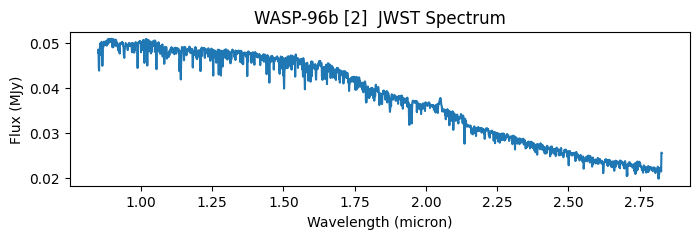

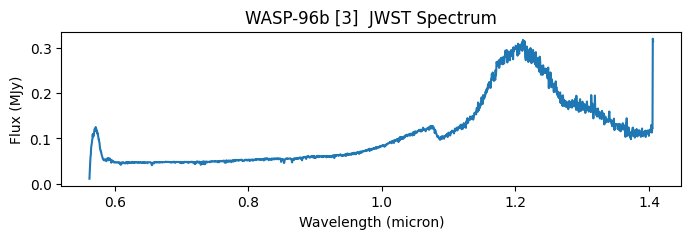

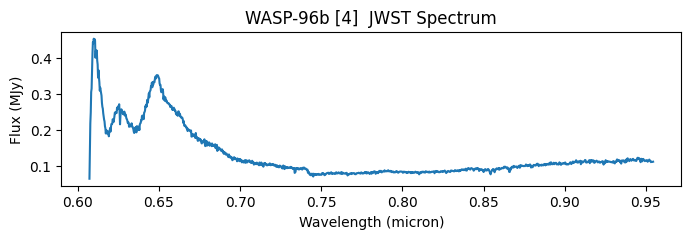

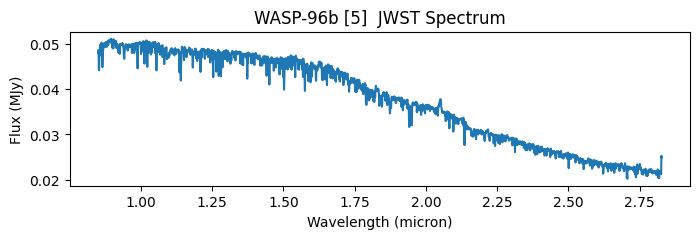

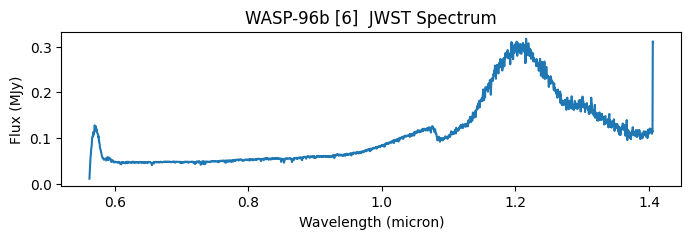

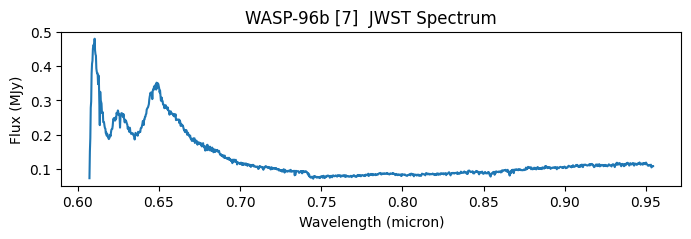

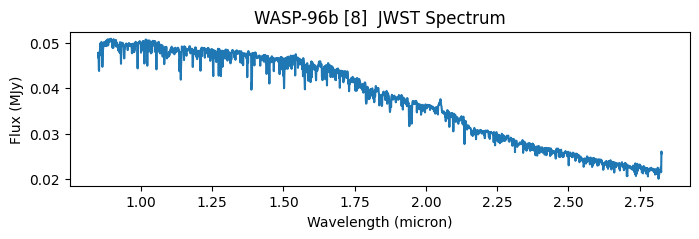

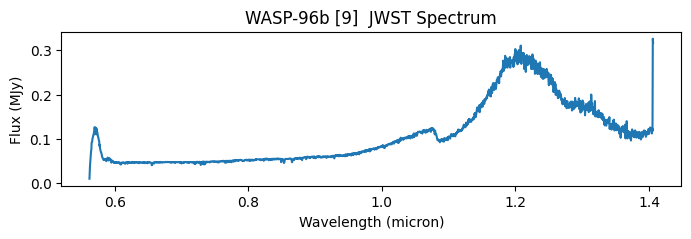

In [52]:
from astropy.io import fits
import matplotlib.pyplot as plt

target = "WASP-96b"

for i in range(2, 10):
    df = fits.getdata("./mastDownload/JWST/jw02734-o002_t002_niriss_clear-gr700xd-substrip256/jw02734-o002_t002_niriss_clear-gr700xd-substrip256_x1dints.fits", i)
    # Plot the spectra
    plt.figure(figsize=(8, 2))
    plt.plot(df['WAVELENGTH'], df['FLUX'], label='FLUX')
    plt.xlabel("Wavelength (micron)")
    plt.ylabel("Flux (MJy)")
    plt.title(str(target) + ' [' + str(i) + '] ' + " JWST Spectrum")
    plt.show()

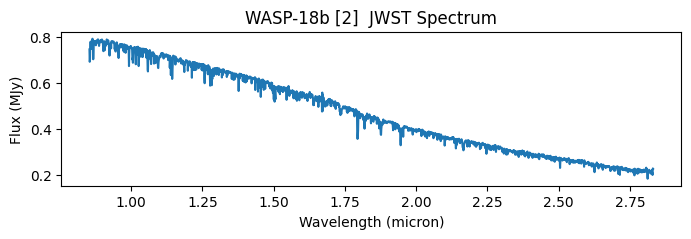

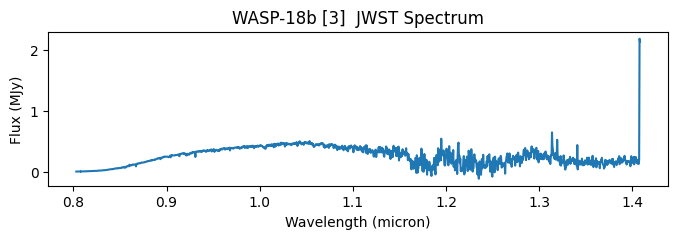

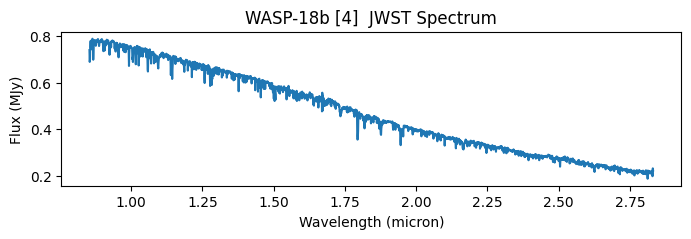

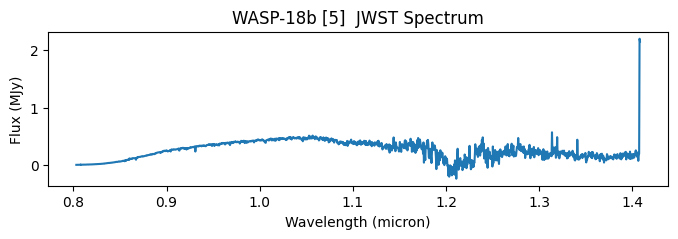

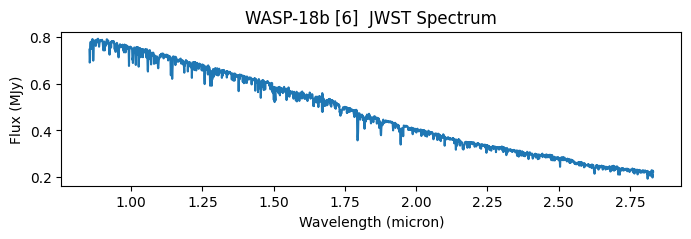

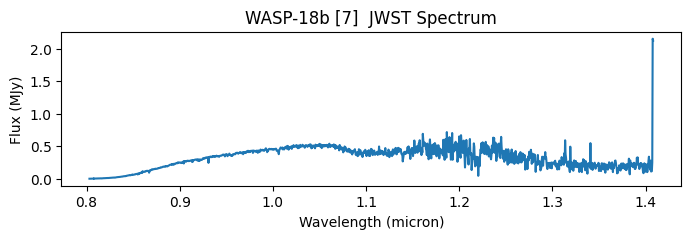

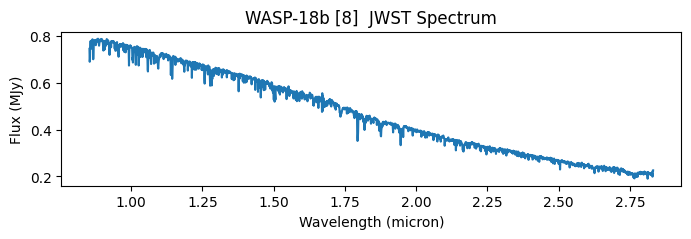

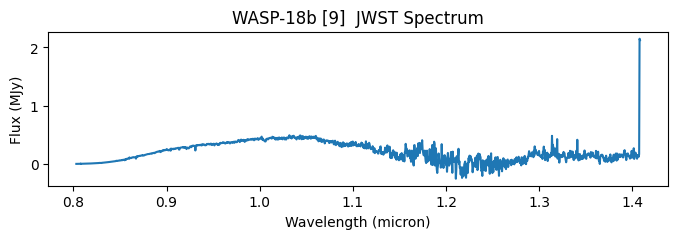

In [46]:
from astropy.io import fits
import matplotlib.pyplot as plt

target = "WASP-18b"

for i in range(2, 10):
    df = fits.getdata("./mastDownload/JWST/jw01366-o021_t003_niriss_clear-gr700xd-substrip96/jw01366-o021_t003_niriss_clear-gr700xd-substrip96_x1dints.fits", i)
    # Plot the spectra
    plt.figure(figsize=(8, 2))
    plt.plot(df['WAVELENGTH'], df['FLUX'], label='FLUX')
    plt.xlabel("Wavelength (micron)")
    plt.ylabel("Flux (MJy)")
    plt.title(str(target) + ' [' + str(i) + '] ' + " JWST Spectrum")
    plt.show()


https://spacetelescope.github.io/mast_notebooks/notebooks/JWST/SI_keyword_exoplanet_search/SI_keyword_exoplanet_search.html

In [69]:
from astropy.io import fits
from astropy.table import unique, vstack
from astropy.time import Time
from astroquery.mast import Mast,Observations

import matplotlib.pyplot as plt

In [71]:
def set_params(parameters):
    return [{"paramName" : p, "values" : v} for p, v in parameters.items()]

def set_mjd_range(min, max):
    '''Set time range in MJD given limits expressed as ISO-8601 dates'''
    return {
        "min": Time(min, format='isot').mjd, 
        "max": Time(max, format='isot').mjd
    }

In [73]:
# Looking for NIRISS SOSS commissioning and ERS data taken between June 1st and August 4th
keywords = {'category': ['COM','ERS'],
            'exp_type': ['NIS_SOSS'],
            'tsovisit': ['T'],
            'date_obs_mjd': [set_mjd_range('2022-06-01','2022-08-04')]
           }

# Restructuring the keywords dictionary to the MAST syntax
params = {'columns': '*',
          'filters': set_params(keywords)
}

In [74]:
params

{'columns': '*',
 'filters': [{'paramName': 'category', 'values': ['COM', 'ERS']},
  {'paramName': 'exp_type', 'values': ['NIS_SOSS']},
  {'paramName': 'tsovisit', 'values': ['T']},
  {'paramName': 'date_obs_mjd', 'values': [{'min': 59731.0, 'max': 59795.0}]}]}

In [75]:
# Calling the SI keyword search service for NIRISS with our parameters
service = 'Mast.Jwst.Filtered.Niriss'
t = Mast.service_request(service, params)

# Let's display the notebook
display_columns = [x for x in t.colnames if x!="s_region"]
t[display_columns].show_in_notebook(display_length=5)

idx,ArchiveFileID,filename,fileSetName,productLevel,act_id,apername,asnpool,asntable,bartdelt,bendtime,bkgdtarg,bkglevel,bkgsub,bmidtime,bstrtime,category,cont_id,datamode,dataprob,date,date_mjd,date_end,date_end_mjd,date_obs,date_obs_mjd,detector,drpfrms1,drpfrms3,duration,effexptm,effinttm,eng_qual,exp_type,expcount,expend,expmid,exposure,expripar,expstart,fastaxis,filter,frmdivsr,gainfact,gdstarid,groupgap,gs_dec,gs_mag,gs_order,gs_ra,gsendtim,gsendtim_mjd,gsstrttm,gsstrttm_mjd,gs_udec,gs_umag,gs_ura,helidelt,hendtime,hga_move,hmidtime,hstrtime,instrume,intarget,is_psf,lamp,mu_dec,mu_epoch,mu_epoch_mjd,mu_ra,nexposur,nextend,nframes,ngroups,nints,nresets,nrststrt,nsamples,numdthpt,nwfsest,obs_id,observtn,obslabel,origin,pcs_mode,pi_name,pps_aper,prd_ver,program,prop_dec,prop_ra,pwfseet,readpatt,sca_num,scicat,sdp_ver,selfref,seq_id,slowaxis,subarray,subcat,subsize1,subsize2,substrt1,substrt2,targ_dec,targ_ra,targname,targoopp,targprop,targtype,targudec,targura,telescop,template,tframe,tgroup,timesys,title,tsample,tsovisit,visit,visit_id,visitend,visitend_mjd,visitgrp,visitsta,visitype,vststart,vststart_mjd,xoffset,yoffset,zerofram,errtype,rois,roiw,wpower,wtype,datamodl,exp_only,exsegnum,exsegtot,intstart,intend,date_beg,date_beg_mjd,obsfoldr,sctarate,opmode,osf_file,expsteng,expsteng_mjd,masterbg,scatfile,srctyapt,tcatfile,texptime,patt_num,pattsize,patttype,pridtpts,subpxpts,crowdfld,engqlptg,oss_ver,noutputs,gs_v3_pa,dirimage,pixfrac,pxsclrt,segmfile,va_dec,va_ra,compress,bkgmeth,targcat,targdesc,gsc_ver,primecrs,extncrs,cal_ver,cal_vcs,crds_ctx,crds_ver,focuspos,fwcpos,pupil,pwcpos,nrimdtpt,fileSize,checksum,ingestStartDate,ingestStartDate_mjd,ingestCompletionDate,ingestCompletionDate_mjd,FileTypeID,publicReleaseDate,publicReleaseDate_mjd,isRestricted,isItar,isStale,FileSetId,dataURI
0,89957007,jw01091002001_03102_00001-seg001_nis_ramp.fits,jw01091002001_03102_00001,2a,02,NIS_SUBSTRIP256,--,--,128.86189597193152,59735.51178619959,f,nan,--,59735.50669918716,59735.501612174725,COM,--,91,f,/Date(1712689643699)/,60409.796802083336,/Date(1654431289470)/,59735.51029479167,/Date(1654430410430)/,59735.500120717596,NIS,0,0,879.859,659.28,16.482,OK,NIS_SOSS,6,59735.51029479167,59735.50520775463,1,PRIME,59735.500120717596,-2,F277W,1,nan,N4FF005860,0,60.45670326480025,16.48115348815918,1,260.9997561069748,/Date(1654410251219)/,59735.26679652778,/Date(1654410163155)/,59735.26577726852,0.2179712,0.101490780711174,0.205354422,128.5296595422551,59735.51178235419,f,59735.50669534179,59735.501608329396,NIRISS,f,--,NONE,0.003759,/Date(946684800000)/,51544.0,0.004891999920901248,6,3,1,3,40,1,1,1,--,59735.904391365744,V01091002001P0000000003102,2,BD+601753 Time Series,STSCI,FINEGUIDE,"Martel, Andre",NIS_SUBSTRIP256,PRDOPSSOC-065,1091,60.43078055555555,261.21785666666665,59733.83290263889,NISRAPID,496,--,2023_4a,--,1,-1,SUBSTRIP256,NIRISS,2048,256,1,1793,60.43080397320562,261.217918424571,BD+60 1753,f,BD+60-1753,FIXED,0.1,0.1,JWST,NIRISS Single-Object Slitless Spectroscopy,5.494,5.494,UTC,NIRISS GR700XD Flux Calibration,10.0,t,1,01091002001,/Date(1654431337406)/,59735.51084960648,03,SUCCESSFUL,PRIME_TARGETED_FIXED,/Date(1654410060755)/,59735.26459208333,nan,nan,f,--,nan,nan,nan,--,RampModel,f,1,1,1,40,/Date(1654430410430)/,59735.500120717596,--,0.000726542821696803,--,2022156T164116307_002_osf.xml,--,nan,--,--,POINT,--,nan,1,--,--,--,--,f,CALCULATED_TRACK_TR_202111,008.004.007.000,1,189.2489595094376,--,nan,nan,--,60.429979210607335,261.229168264157,f,--,Calibration,A stars; Photometric; Spectrophotometric,GSC30,0.15556226438030055,0.0,1.13.3,RELEASE,jwst_1225.pmap,11.17.14,0.33108413200000075,314.86022899999944,GR700XD,245.7982180000013,--,568399680,30371d914b5ebe1692cf1c6ac09dba93,/Date(1712689865039)/,60409.79936388889,/Date(1712689877616)/,60409.79950944444,76,/Date(1657830600000)/,59774.854166666664,False,False,False,782651,mast:JWST/product/jw01091002001_03102_00001-seg001_nis_ramp.fits
1,89957010,jw01091002001_03102_00001-seg001_nis_r

In [76]:
# Unique file names:
fn = list(set(t['filename']))

# Set of derived Observation IDs:
ids = list(set(['_'.join(x.split('_')[:-1]) for x in fn]))

In [77]:
ids

['jw01541-o001_t002_niriss_clear-gr700xd-substrip256',
 'jw01091002001_03101_00001-seg004_nis',
 'jw01366001001_04102_00001-seg001_nis',
 'jw02734002001_04101_00001-seg002_nis',
 'jw02734-o002_t002_niriss_clear-gr700xd-substrip256',
 'jw02734002001_04101_00001-seg003_nis',
 'jw02734-o001_t001_niriss_clear-gr700xd-substrip256',
 'jw01091-o002_t001_niriss_clear-gr700xd-substrip256',
 'jw02734001001_04101_00001-seg003_nis',
 'jw01541001001_04101_00001-seg004_nis',
 'jw01091002001_03101_00001-seg003_nis',
 'jw01541001001_04101_00001-seg001_nis',
 'jw01091002001_03101_00001-seg001_nis',
 'jw02734002001_04102_00001-seg001_nis',
 'jw01091002001_03101_00001-seg005_nis',
 'jw01366001001_04101_00001-seg004_nis',
 'jw01366-o001_t001_niriss_clear-gr700xd-substrip256',
 'jw01366001001_04101_00001-seg002_nis',
 'jw01541001001_04102_00001-seg001_nis',
 'jw01091002001_03102_00001-seg001_nis',
 'jw01091002001_03101_00001-seg002_nis',
 'jw01366001001_04101_00001-seg003_nis',
 'jw02734001001_04102_00001-

In [78]:
# Getting the observations using the `obs_id`s extracted above
matched_obs = Observations.query_criteria(instrument_name='NIRISS*', 
                                          obs_id=ids
                                         )

# Let's display the results
display_cols = [x for x in matched_obs.columns if x!='s_region']
matched_obs[display_cols]

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str4,str7,str11,str4,str13,str8,str10,str54,str50,float64,float64,str8,str21,int64,float64,float64,float64,float64,float64,str70,float64,str4,str3,int64,str63,str81,str16,bool,float64,str9,str9
science,JWST,CALJWST,NIRISS/SOSS,JWST,CLEAR;GR700XD,Infrared,WASP-39,Star; Exoplanet Systems,jw01366001001_04102_00001-seg001_nis,217.32661043978118,-3.444499322617553,image,"Batalha, Natalie",2,59787.207505370374,59787.21386416667,494.46,600.0,2800.0,The Transiting Exoplanet Community Early Release Science Program,59787.29994207,1366,ERS,--,mast:JWST/product/jw01366001001_04102_00001-seg001_nis_ramp.jpg,mast:JWST/product/jw01366001001_04102_00001-seg001_nis_rateints.fits,PUBLIC,False,nan,87742159,393561496
science,JWST,CALJWST,NIRISS/SOSS,JWST,CLEAR;GR700XD,Infrared,WASP-39,Star; Exoplanet Systems,jw01366-o001_t001_niriss_clear-gr700xd-substrip256,217.32661044232316,-3.4444993226634986,spectrum,"Batalha, Natalie",3,59786.8567646875,59787.206306388885,26552.502,600.0,2800.0,The Transiting Exoplanet Community Early Release Science Program,59787.58458325,1366,ERS,--,--,mast:JWST/product/jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits,PUBLIC,False,nan,87742481,393561578
science,JWST,CALJWST,NIRISS/SOSS,JWST,CLEAR;GR700XD,Infrared,HAT-P-18,Star; Exoplanet Systems; Exoplanets; K dwarfs,jw02734-o001_t001_niriss_clear-gr700xd-substrip256,256.34634344208274,33.01225418787604,spectrum,"Pontoppidan, Klaus M.",3,59743.164532662035,59743.49048288194,23190.174,600.0,2800.0,JWST Early Release Observation 8,60775.23592595,2734,COM,--,--,mast:JWST/product/jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits,EXCLUSIVE_ACCESS,False,nan,213209364,410283883
science,JWST,CALJWST,NIRISS/SOSS,JWST,CLEAR;GR700XD,Infrared,HAT-P-14,Star; Exoplanet Systems; Exoplanets; F dwarfs; F stars,jw01541-o001_t002_niriss_clear-gr700xd-substrip256,260.11617716308444,38.242156511096134,spectrum,"Espinoza, Nestor",3,59738.26121625,59738.552486493056,18855.408,600.0,2800.0,NIRISS Sensitivity and Stability for Transiting Exoplanet Observations,59774.8541666,1541,COM,--,--,mast:JWST/product/jw01541-o001_t002_niriss_clear-gr700xd-substrip256_x1dints.fits,PUBLIC,False,nan,213209384,410291660
science,JWST,CALJWST,NIRISS/SOSS,JWST,CLEAR;GR700XD,Infrared,HAT-P-14,Star; Exoplanet Systems; Exoplanets; F dwarfs; F stars,jw01541001001_04102_00001-seg001_nis,260.1161771633686,38.242156510427485,image,"Espinoza, Nestor",2,59738.55390866898,59738.55835982639,329.64,600.0,2800.0,NIRISS Sensitivity and Stability for Transiting Exoplanet Observations,59774.8541666,1541,COM,--,mast:JWST/product/jw01541001001_04102_00001-seg001_nis_ramp.jpg,mast:JWST/product/jw01541001001_04102_00001-seg001_nis_rateints.fits,PUBLIC,False,nan,85700205,410291724
science,JWST,CALJWST,NIRISS/SOSS,JWST,CLEAR;GR700XD,Infrared,HAT-P-18,Star; Exoplanet Systems; Exoplanets; K dwarfs,jw02734001001_04102_00001-seg001_nis,256.3463434401183,33.01225418358147,image,"Pontoppidan, Klaus M.",2,59743.49178523148,59743.49877990741,543.906,600.0,2800.0,JWST Early Release Observation 8,59773.625,2734,COM,--,mast:JWST/product/jw02734001001_04102_00001-seg001_nis_ramp.jpg,mast:JWST/product/jw02734001001_04102_00001-seg001_nis_rateints.fits,PUBLIC,False,nan,87602090,410293766
science,JWST,CALJWST,NIRISS/SOSS,JWST,CLEAR;GR700XD,Infrared,WASP-96,Star; Exoplanet Systems; Exoplanets; G dwarfs,jw02734002001_04102_00001-seg001_nis,1.0466429247345095,-47.36063076224905,image,"Pontoppidan, Klaus M.",2,59751.43943475695,59751.44992677083,846.076,600.0,2800.0,JWST Early Release Observation 8,59773.625,2734,COM,--,mast:JWST/product/jw02734002001_04102_00001-seg001_nis_ramp.jpg,mast

In [79]:
print(f'Found {len(matched_obs)} matching Observations.')

Found 10 matching Observations.


In [80]:
batch_size = 5
batches = [matched_obs[i:i+batch_size] for i in range(0, len(matched_obs), batch_size)]

In [81]:
t = [Observations.get_product_list(obs) for obs in batches]

In [82]:
products = unique(vstack(t), keys='productFilename')
print(f'  Number of unique products: {len(products)}')

  Number of unique products: 975


In [84]:
products[0:5]

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str9,str4,str8,str50,str64,str1,str81,str9,str28,str13,str1,str7,str6,str4,str63,int64,str9,str16,int64,str13
84343195,JWST,image,jw01091002001_02101_00004-seg001_nis,source/target (L3) : association generator,S,mast:JWST/product/jw01091-o002_20240409t185426_image2_00001_asn.json,INFO,--,ASN,--,CALJWST,1.10.1,1091,jw01091-o002_20240409t185426_image2_00001_asn.json,1428,118370229,PUBLIC,2,CLEAR;GR700XD
84343178,JWST,image,jw01091002001_02101_00003-seg001_nis,source/target (L3) : association generator,S,mast:JWST/product/jw01091-o002_20240409t185426_image2_00002_asn.json,INFO,--,ASN,--,CALJWST,1.10.1,1091,jw01091-o002_20240409t185426_image2_00002_asn.json,1428,118370229,PUBLIC,2,CLEAR;GR700XD
84343036,JWST,image,jw01091002001_02101_00002-seg001_nis,source/target (L3) : association generator,S,mast:JWST/product/jw01091-o002_20240409t185426_image2_00003_asn.json,INFO,--,ASN,--,CALJWST,1.10.1,1091,jw01091-o002_20240409t185426_image2_00003_asn.json,1428,118370229,PUBLIC,2,CLEAR;GR700XD
84343098,JWST,image,jw01091002001_02101_00001-seg001_nis,source/target (L3) : association generator,S,mast:JWST/product/jw01091-o002_20240409t185426_image2_00004_asn.json,INFO,--,ASN,--,CALJWST,1.10.1,1091,jw01091-o002_20240409t185426_image2_00004_asn.json,1428,118370229,PUBLIC,2,CLEAR;GR700XD
84343158,JWST,spectrum,jw01091002001_03101_00001-seg005_nis,source/target (L3) : association generator,S,mast:JWST/product/jw01091-o002_20240409t185426_tso-spec2_00002_asn.json,INFO,--,ASN,--,CALJWST,1.13.3,1091,jw01091-o002_20240409t185426_tso-spec2_00002_asn.json,1898,118370229,PUBLIC,2,CLEAR;GR700XD


In [85]:
# Retrieve level 2 and 3 SCIENCE and INFO products of type spectrum.
filtered_products = Observations.filter_products(products,
                                                 productType=['SCIENCE', 'INFO'],
                                                 dataproduct_type='spectrum',
                                                 calib_level=[2, 3],
                                                )

In [86]:
filtered_products['description','dataURI', 'calib_level', 'size', 'proposal_id']

description,dataURI,calib_level,size,proposal_id
str64,str81,int64,int64,str4
source/target (L3) : association generator,mast:JWST/product/jw01091-o002_20240409t185426_tso-spec2_00002_asn.json,2,1898,1091
source/target (L3) : association generator,mast:JWST/product/jw01091-o002_20240409t185426_tso-spec2_00003_asn.json,2,1898,1091
source/target (L3) : association generator,mast:JWST/product/jw01091-o002_20240409t185426_tso-spec2_00004_asn.json,2,1898,1091
source/target (L3) : association generator,mast:JWST/product/jw01091-o002_20240409t185426_tso-spec2_00005_asn.json,2,1898,1091
source/target (L3) : association generator,mast:JWST/product/jw01091-o002_20240409t185426_tso-spec2_00006_asn.json,2,1898,1091
source/target (L3) : association generator,mast:JWST/product/jw01091-o002_20240409t185426_tso3_00002_asn.json,3,4796,1091
target (L3) : spectroscopic white-light curve,mast:JWST/product/jw01091-o002_t001_niriss_clear-gr700xd-substrip256_whtlt.ecsv,3,96672,1091
exposure/target (L2b/L3): 1D extracted spectrum per integration,mast:JWST/product/jw01091-o002_t001_niriss_clear-gr700xd-substrip256_x1dints.fits,3,776148480,1091
exposure (L2b): 3D calibrated exposure,mast:JWST/product/jw01091002001_03101_00001-seg001_nis_calints.fits,2,2424464640,1091


In [87]:
# Observations.login()

In [88]:
# Downloading via a bash script.

manifest = Observations.download_products(filtered_products,
                                          curl_flag=True
                                          )

In [89]:
# We are fixing the file for reproducability
Observations.download_file("mast:JWST/product/jw02734001001_04101_00001-seg004_nis_rate.fits");

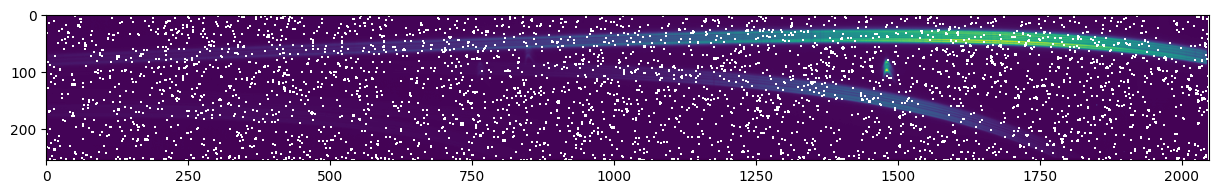

In [90]:
# Read in the "SCI" data from the fits file
sci = fits.getdata("jw02734001001_04101_00001-seg004_nis_rate.fits", 1)

plt.figure(figsize=(15, 10))
plt.imshow(sci);

In [14]:
from astropy.io import fits
df = fits.getdata("./mastDownload/JWST/jw01366-o021_t003_niriss_clear-gr700xd-substrip96/jw01366-o021_t003_niriss_clear-gr700xd-substrip96_x1dints.fits", 3)

In [15]:
df.columns

ColDefs(
    name = 'WAVELENGTH'; format = 'D'
    name = 'FLUX'; format = 'D'; unit = 'MJy'
    name = 'FLUX_ERROR'; format = 'D'; unit = 'MJy'
    name = 'FLUX_VAR_POISSON'; format = 'D'; unit = 'MJy^2'
    name = 'FLUX_VAR_RNOISE'; format = 'D'; unit = 'MJy^2'
    name = 'FLUX_VAR_FLAT'; format = 'D'; unit = 'MJy^2'
    name = 'SURF_BRIGHT'; format = 'D'
    name = 'SB_ERROR'; format = 'D'
    name = 'SB_VAR_POISSON'; format = 'D'
    name = 'SB_VAR_RNOISE'; format = 'D'
    name = 'SB_VAR_FLAT'; format = 'D'
    name = 'DQ'; format = 'J'; bzero = 2147483648
    name = 'BACKGROUND'; format = 'D'; unit = 'MJy'
    name = 'BKGD_ERROR'; format = 'D'; unit = 'MJy'
    name = 'BKGD_VAR_POISSON'; format = 'D'; unit = 'MJy^2'
    name = 'BKGD_VAR_RNOISE'; format = 'D'; unit = 'MJy^2'
    name = 'BKGD_VAR_FLAT'; format = 'D'; unit = 'MJy^2'
    name = 'NPIXELS'; format = 'D'
)

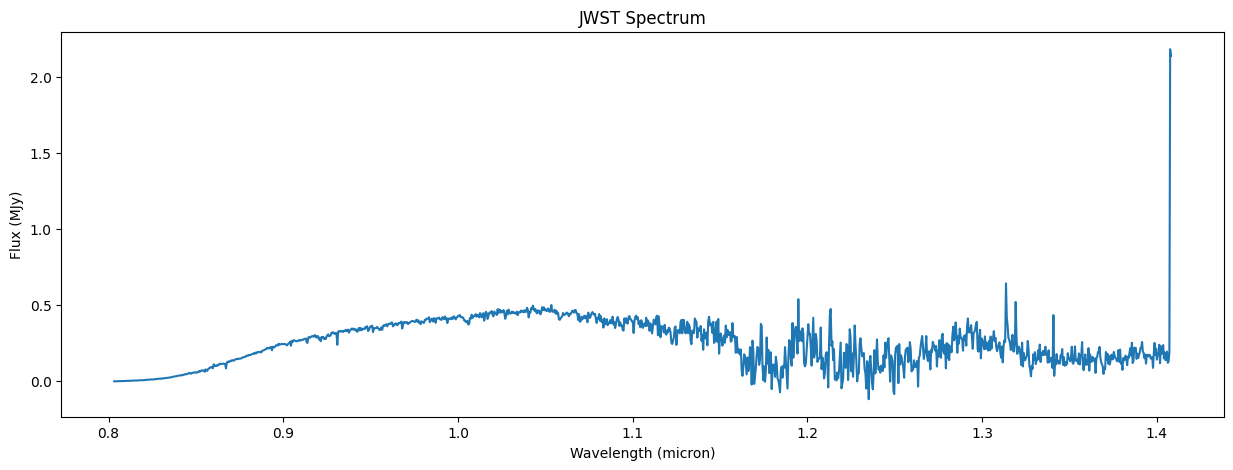

In [17]:
import matplotlib.pyplot as plt

# Plot the spectra
plt.figure(figsize=(15, 5))
plt.plot(df['WAVELENGTH'], df['FLUX'], label='FLUX')
plt.xlabel("Wavelength (micron)")
plt.ylabel("Flux (MJy)")
plt.title("JWST Spectrum")
plt.show()